In [3]:
import pandas as pd

file_path = "./dataset/CAC40_stocks_2021_2023.csv"
data = pd.read_csv(file_path)

# Data preprocessing
specific_stock = 'AC.PA'  # Remplacez par le nom du stock souhaité
if 'Stock' in data.columns:  # Vérifiez que la colonne existe
    data = data[data['Stock'] == specific_stock]
data

,Date,Open,High,Low,Close,Adj Close,Volume,Stock
0,2020-04-08,28.559999,28.559999,26.639999,28.270000,28.270000,1051666.0,AC.PA
1,2020-04-09,28.629999,29.570000,28.049999,28.639999,28.639999,990955.0,AC.PA
2,2020-04-14,28.010000,28.340000,27.150000,27.590000,27.590000,907178.0,AC.PA
3,2020-04-15,27.170000,27.299999,25.459999,25.660000,25.660000,1378290.0,AC.PA
4,2020-04-16,25.879999,26.700001,24.080000,24.570000,24.570000,1474307.0,AC.PA
...,...,...,...,...,...,...,...,...
767,2023-03-31,29.799999,30.090000,29.629999,29.969999,29.969999,570798.0,AC.PA
768,2023-04-03,29.969999,30.020000,29.799999,29.980000,29.980000,563712.0,AC.PA
769,2023-04-04,30.020000,30.150000,29.510000,29.510000,29.510000,557226.0,AC.PA
770,2023-04-05,29.559999,29.680000,28.590000,28.790001,28.790001,945880.0,AC.PA


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

In [6]:
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1)) 

In [7]:
import numpy as np

def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

In [8]:
time_step = 100
X, y = create_dataset(scaled_data, time_step)

In [9]:
train_size = 0.8

In [10]:
X_train, X_test = X[:int(X.shape[0]*train_size)], X[int(X.shape[0]*train_size):]
y_train, y_test = y[:int(y.shape[0]*train_size)], y[int(y.shape[0]*train_size):]

In [14]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=64, activation='relu'))
model.add(Dense(units=64))
model.add(Dense(units=1))

/home/abel/personnal_projects/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0089
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0065
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0063
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0054
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0049
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0056
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0048
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0043
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0049
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0044
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0044
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0049
Epoch 13/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0047
Epoch 14/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0040
Epoch 15/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - lo

In [17]:
test_loss = model.evaluate(X_test, y_test)
test_loss

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0021 


0.002312160562723875

In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [19]:
original_data = data['Close'].values
predicted_data = np.empty_like(original_data)
predicted_data[:] = np.nan
predicted_data[-len(predictions):] = predictions.reshape(-1)

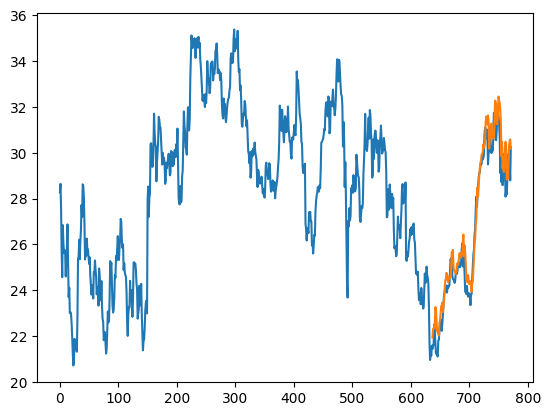

In [21]:
import matplotlib.pyplot as plt

plt.plot(original_data)
plt.plot(predicted_data)

In [22]:
new_predictions = model.predict(X_test[-90:])
new_predictions = scaler.inverse_transform(new_predictions)
predicted_data = np.append(predicted_data, new_predictions)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


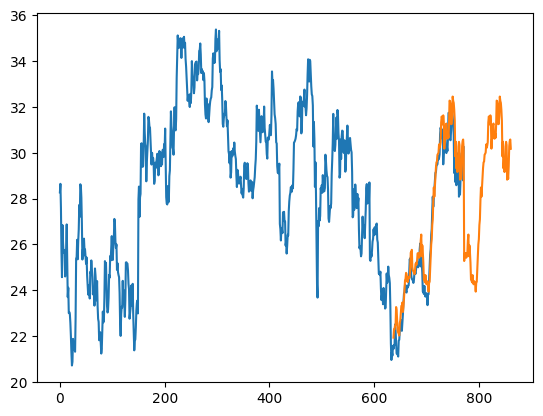

In [23]:
plt.plot(original_data)
plt.plot(predicted_data)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of days to remove for validation
validation_days = 90

# Split the dataset
train_data = original_data[:-validation_days]  # All except the last 'validation_days'
validation_data = original_data[-validation_days:]  # The last 'validation_days'

# Train your model on 'train_data'
# Example: model.fit(train_data)

# Predict the removed days
# Example: predicted_validation = model.predict(validation_days)
predicted_data_2 = np.random.random(validation_days)  # Replace with your model's predictions
new_predictions_2 = model.predict(X_test[-90:])
new_predictions_2 = scaler.inverse_transform(new_predictions_2)
predicted_data_2 = np.append(predicted_data_2, new_predictions_2)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(len(original_data)), original_data, label="Original Data")
plt.plot(range(len(train_data)), train_data, label="Training Data")
plt.plot(range(len(train_data), len(original_data)), predicted_validation, label="Predicted Validation Data")
plt.plot(range(len(train_data), len(original_data)), validation_data, label="Actual Validation Data")
plt.legend()
plt.show()